In [1]:
import pandas as pd
# import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("housing_dataset.csv", sep=",")
# dfp = pl.read_csv("housing_dataset.csv", infer_schema_length=0)

In [3]:
# Dimension du data
df.shape

(1460, 81)

In [4]:
pd.set_option("display.max_column", 81)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
# Identifier le nombre de colonnes de chaque types 
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

<Axes: >

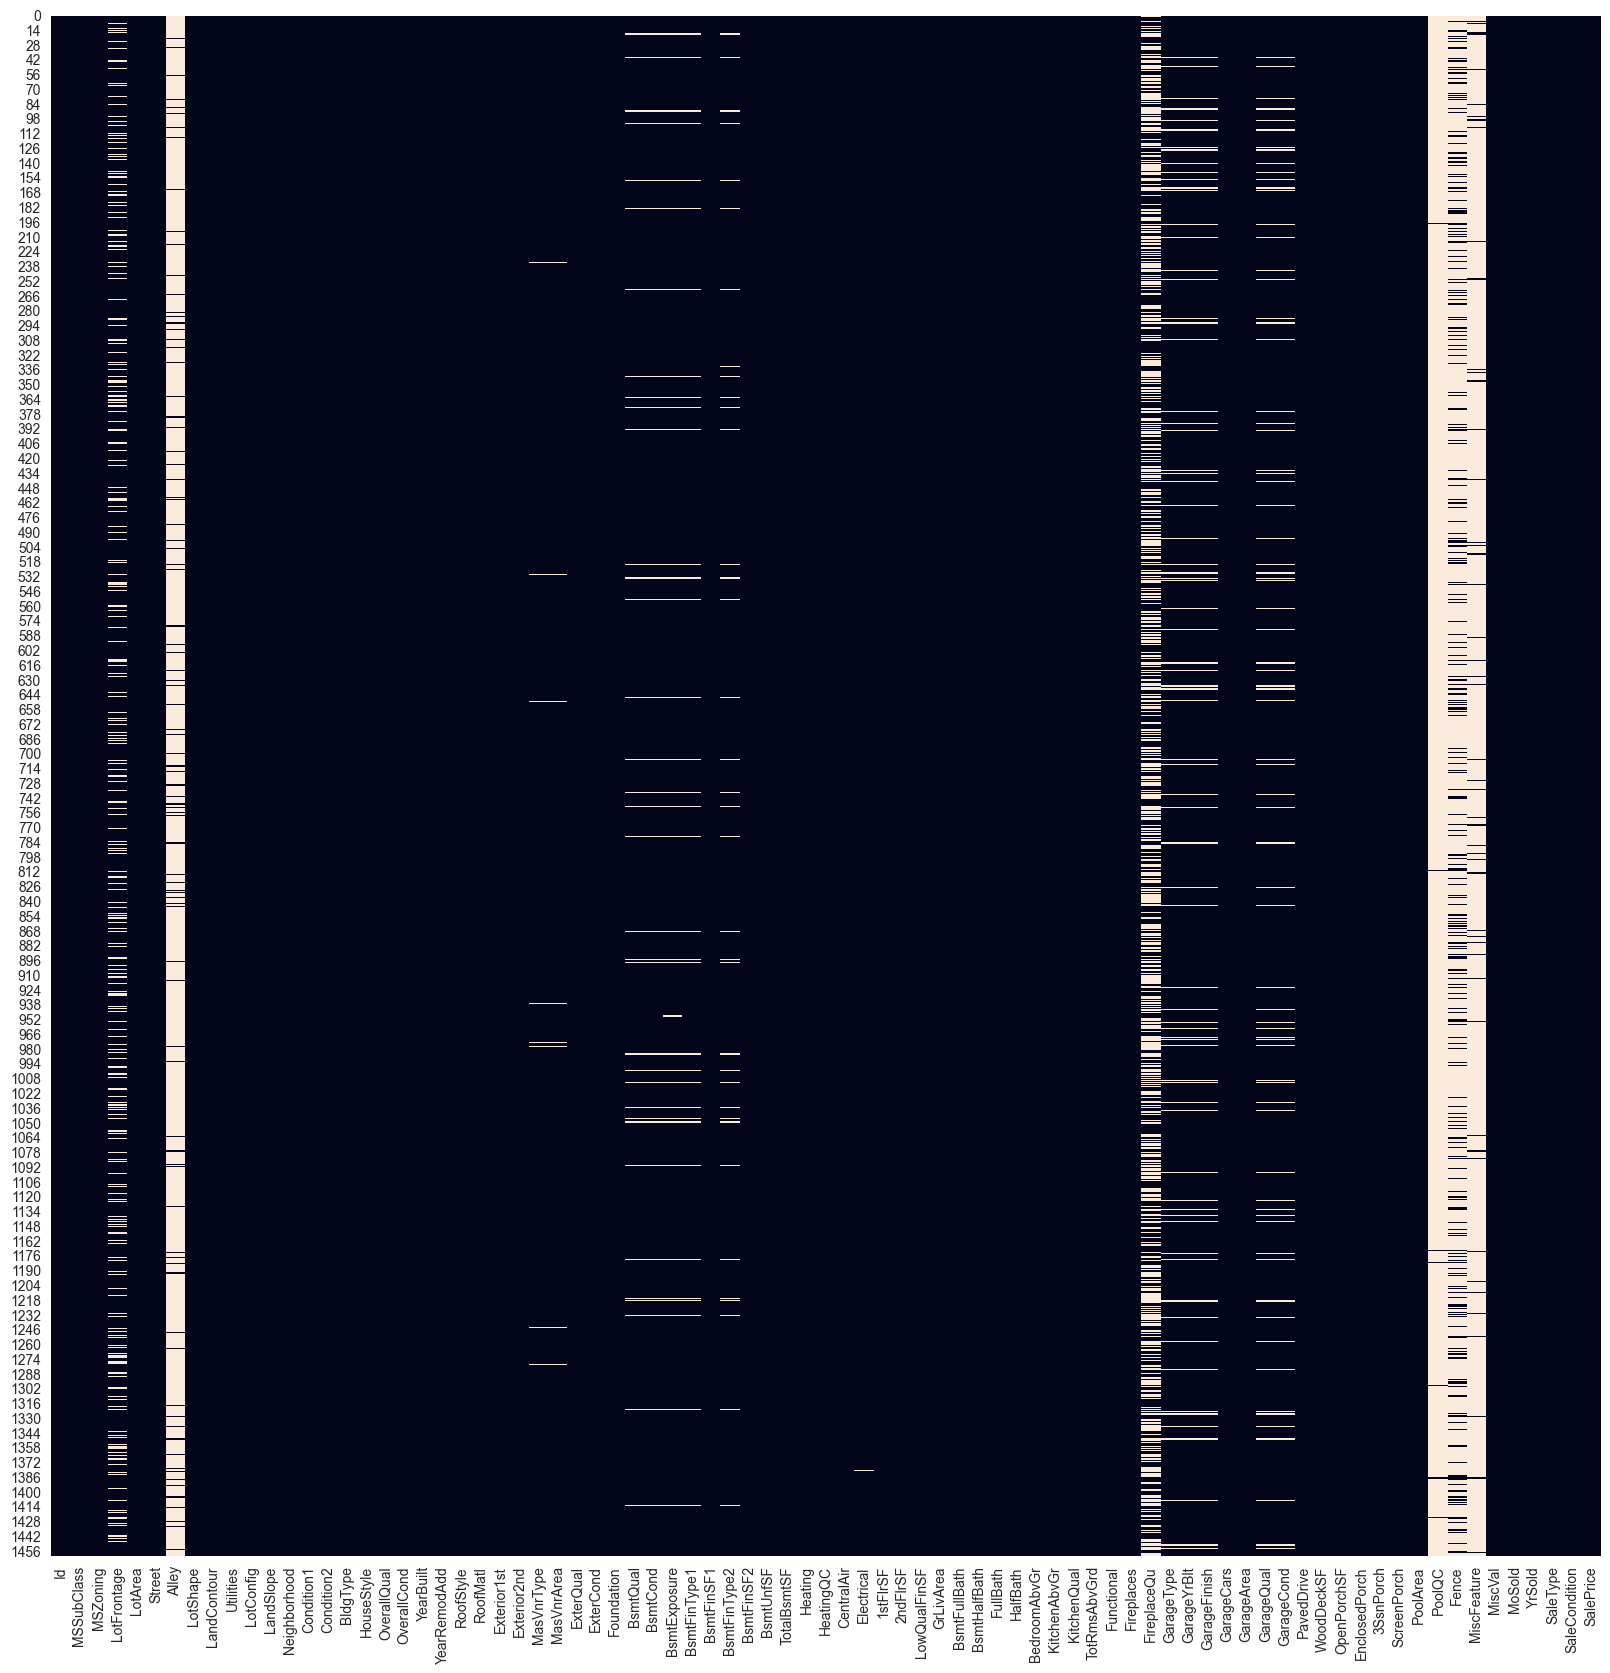

In [6]:
# Vision générale des Na
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), cbar=False)

In [7]:
# Voir le pourcentage de valeur manquante par colonne
missing_rate = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)
columnnull = df.columns[df.isna().sum()/df.shape[0] != 0 ]
dfNul = df[df.columns[df.isna().sum()/df.shape[0] != 0]]
null = dfNul.isnull().sum()
(dfNul.isna().sum()/dfNul.shape[0]).sort_values(ascending=False)


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

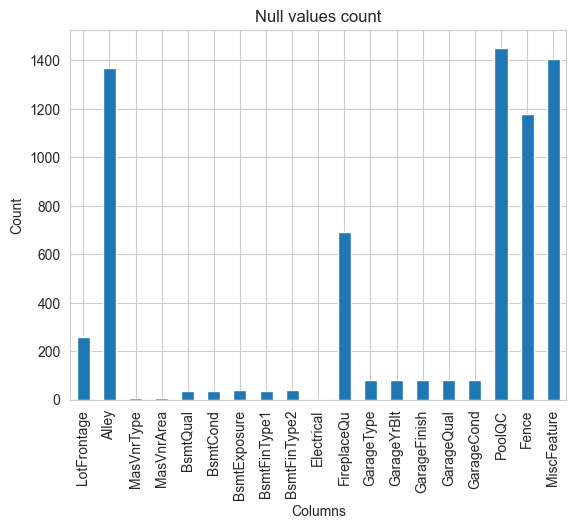

In [8]:
# visualisation
null.plot(kind='bar')
plt.title('Null values count')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.show()


inspection VD

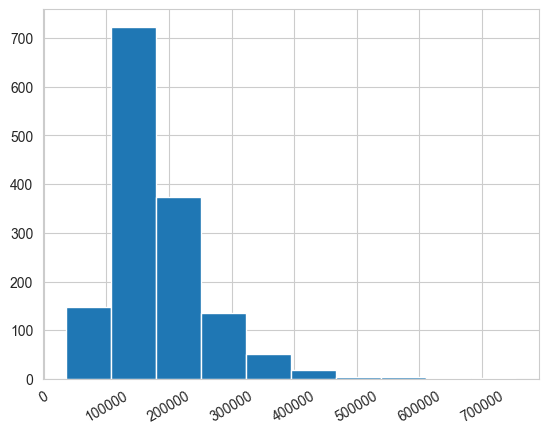

In [9]:
# Visualisation de la distribution de la variable cible
plt.hist(df['SalePrice'])
plt.xticks(rotation=30)
# plt.scatter(df['SalePrice'])
plt.show()

## Histo des variables

In [11]:
# Visualisation des valeurs catégorielles de chaque colonne
for col in df.select_dtypes('object'):
    print(f'{col :-<50}, {df[col].unique()}')


MSZoning------------------------------------------, ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street--------------------------------------------, ['Pave' 'Grvl']
Alley---------------------------------------------, [nan 'Grvl' 'Pave']
LotShape------------------------------------------, ['Reg' 'IR1' 'IR2' 'IR3']
LandContour---------------------------------------, ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities-----------------------------------------, ['AllPub' 'NoSeWa']
LotConfig-----------------------------------------, ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope-----------------------------------------, ['Gtl' 'Mod' 'Sev']
Neighborhood--------------------------------------, ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1----------------------------------------, ['Norm' 'Feedr' 'PosN' 'Artery' 

/var/folders/5q/r1c10psn4318mx73yvb0rq6h0000gn/T/ipykernel_43028/2589037968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=0.7)


<Axes: >

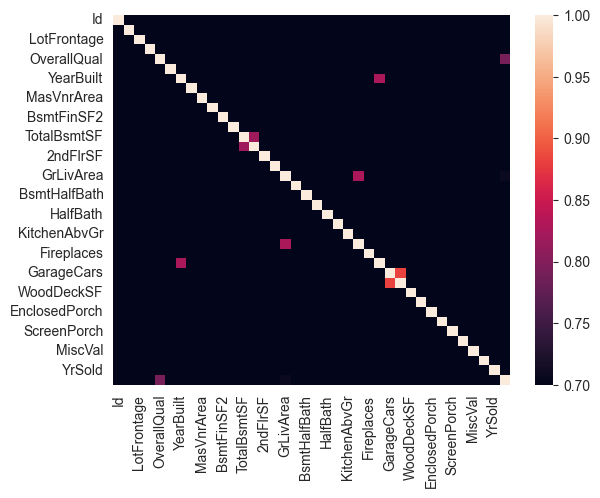

In [12]:
# Petite visualisation de la corrélation sup à 0.7
sns.heatmap(df.corr(), vmin=0.7)


In [13]:
# Affichage des corrélations les plus élevées
c = df.corr().abs()
s = c.unstack()
# so = (s.sort_values(ascending=False))
so = s[(s > 0.6) & (s < 1)].sort_values(ascending=False).drop_duplicates()
so



/var/folders/5q/r1c10psn4318mx73yvb0rq6h0000gn/T/ipykernel_43028/2065815691.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr().abs()


GarageCars    GarageArea      0.882475
GarageYrBlt   YearBuilt       0.825667
GrLivArea     TotRmsAbvGrd    0.825489
TotalBsmtSF   1stFlrSF        0.819530
OverallQual   SalePrice       0.790982
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
BedroomAbvGr  TotRmsAbvGrd    0.676620
BsmtFullBath  BsmtFinSF1      0.649212
GarageYrBlt   YearRemodAdd    0.642277
GarageCars    SalePrice       0.640409
GrLivArea     FullBath        0.630012
SalePrice     GarageArea      0.623431
TotRmsAbvGrd  2ndFlrSF        0.616423
SalePrice     TotalBsmtSF     0.613581
HalfBath      2ndFlrSF        0.609707
SalePrice     1stFlrSF        0.605852
GarageCars    OverallQual     0.600671
dtype: float64

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

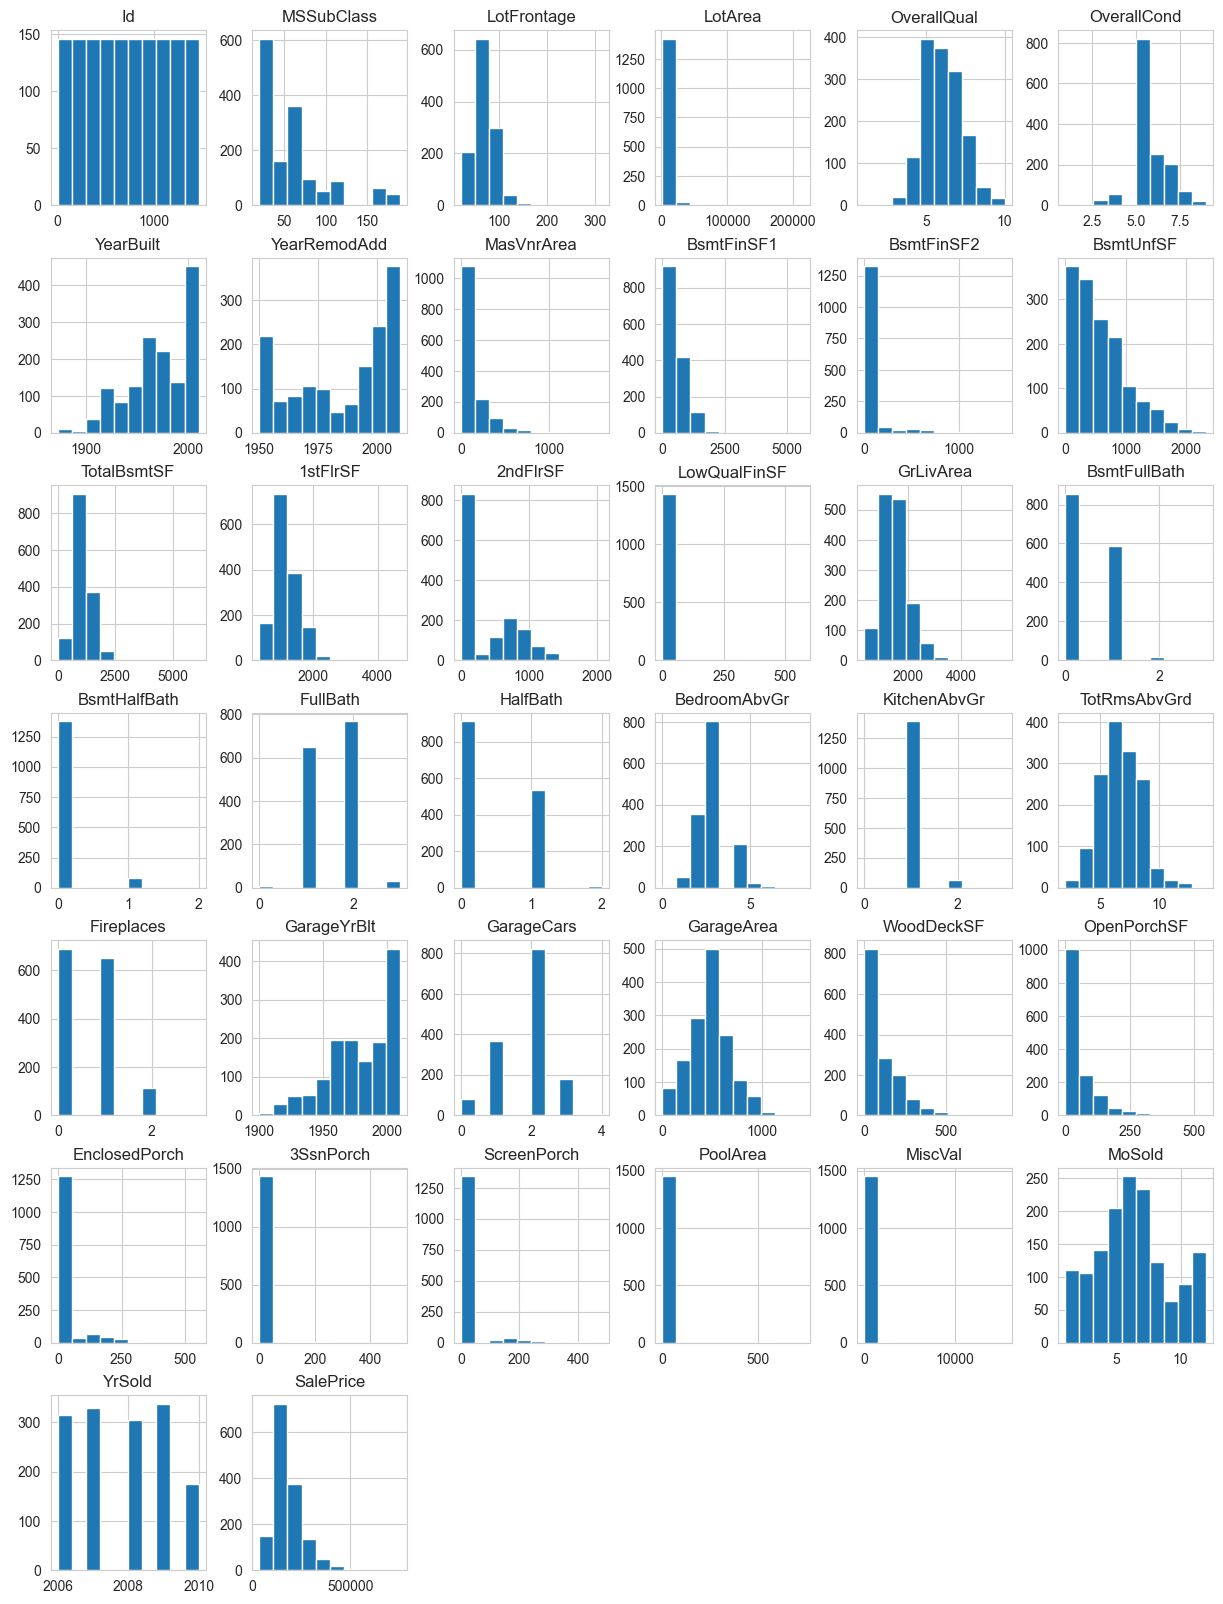

In [15]:
# visualisation des distribution pour chaque colonnes numérique
df.hist(figsize = (15,20))

Outliers Analyses

In [16]:
# mise en forme pour calculer les outliers
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_cols = df.select_dtypes(['float64', 'int64'])
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(
    num_cols), columns=num_cols.columns, index=num_cols.index)

df_standardized


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.208034,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.992426,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.409895,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.101543,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.084449,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.911391,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.414011,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.789839,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.574676,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,0.870874,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.331620,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.572835,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.830356,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.615871,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084610,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,-0.020508,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.166839,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.572835,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.519651,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.084449,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.572835,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,-0.832788,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.154995,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


<Axes: >

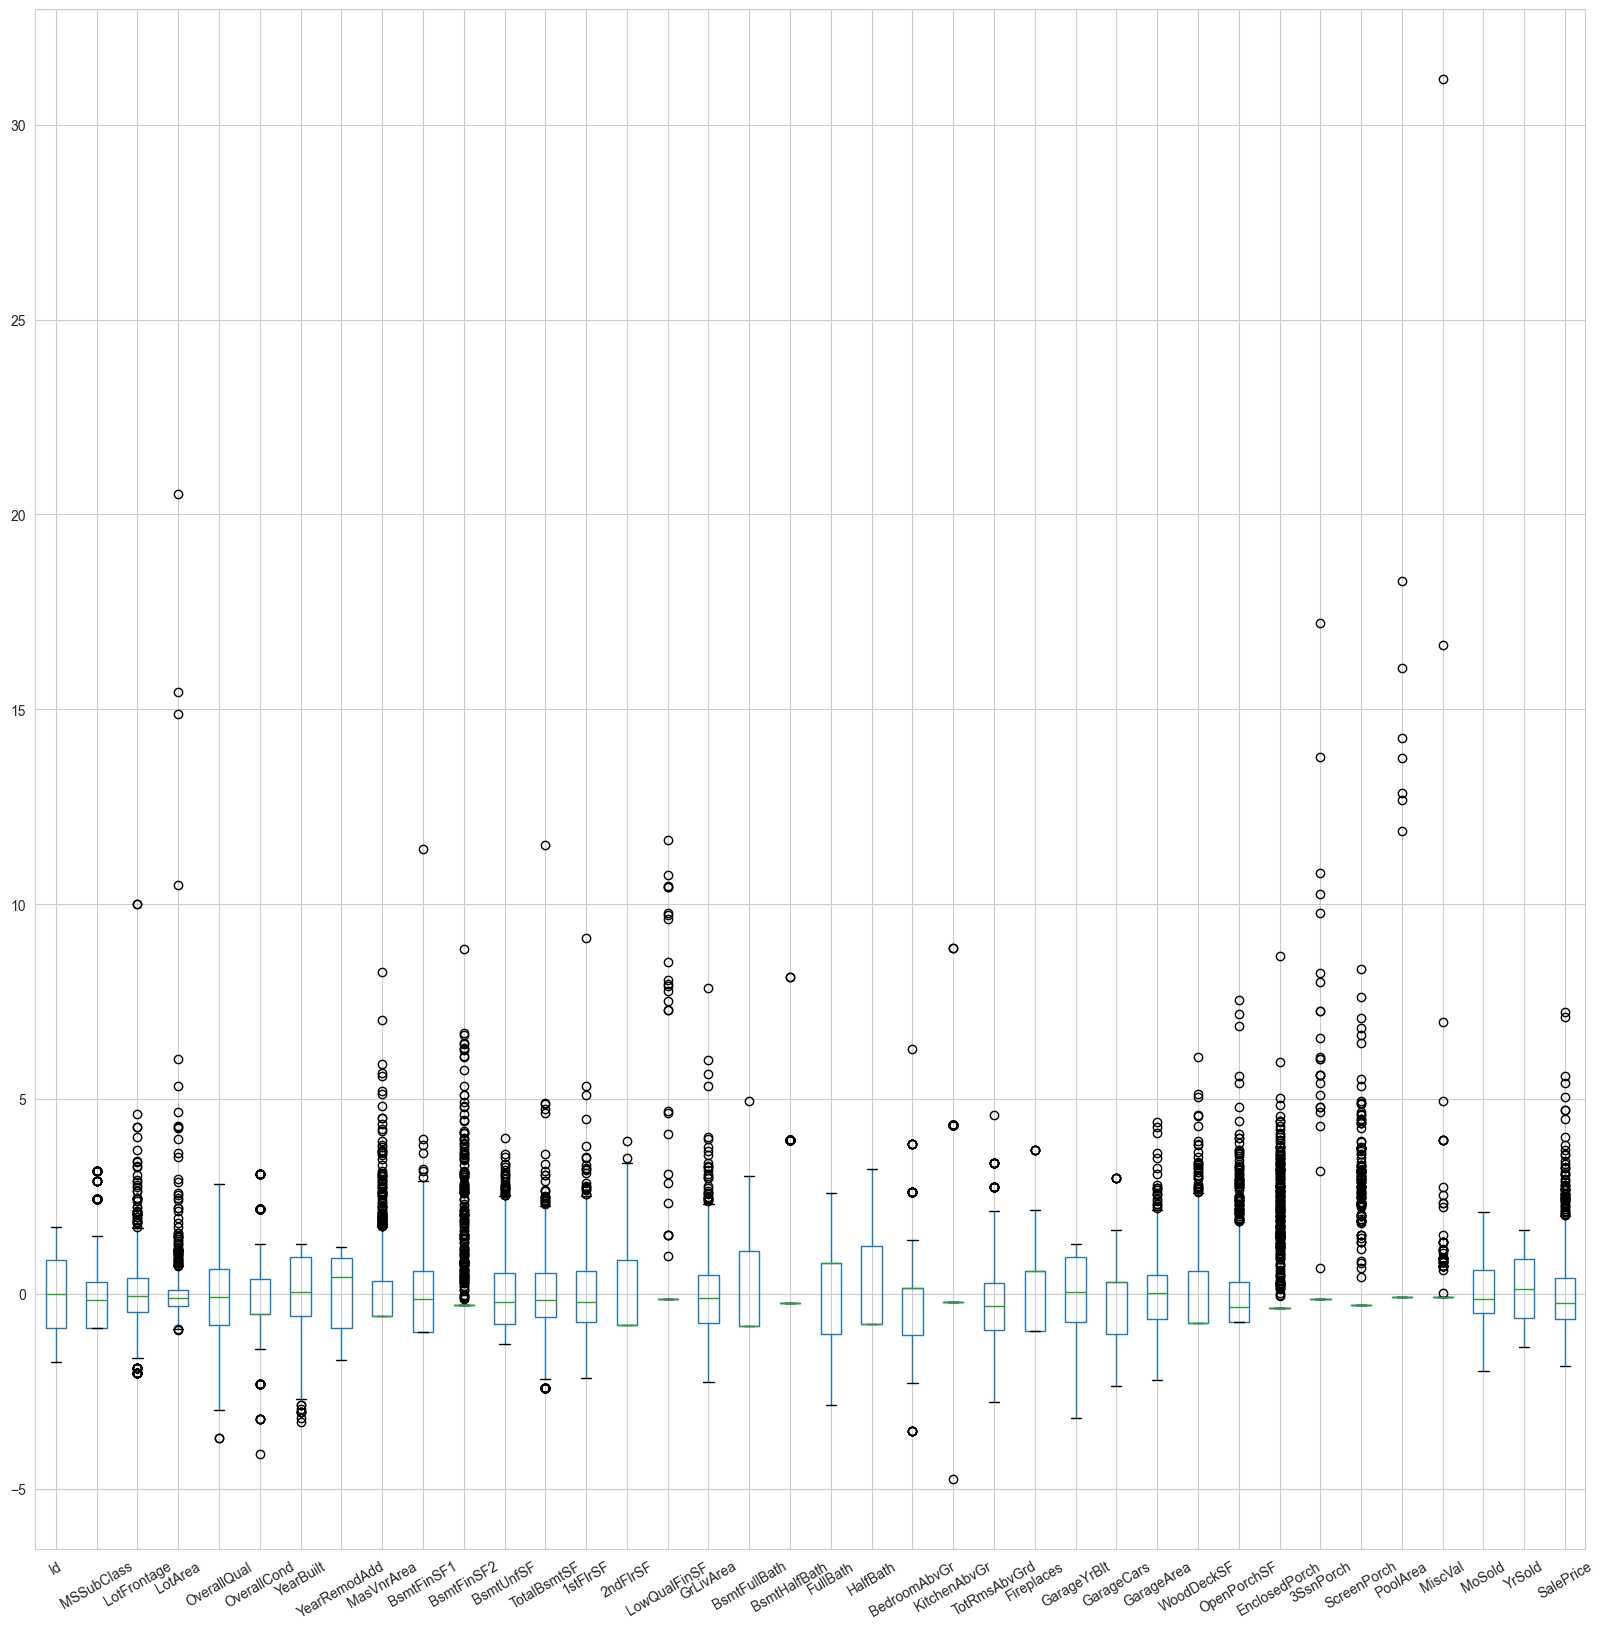

In [17]:
# Visualisation des outliers
df_standardized.boxplot(figsize=(20,20), rot=30)

In [18]:
# Affichage du nombre de valeurs aberrantes par colonne
Q1 = df_standardized.quantile(0.25)
Q3 = df_standardized.quantile(0.75)
IQR = Q3 - Q1

(((df_standardized < (Q1 - 1.5 * IQR)) | (df_standardized > (Q3 + 1.5 * IQR))).sum()).sort_values(ascending=False)

EnclosedPorch    208
BsmtFinSF2       167
OverallCond      125
ScreenPorch      116
MSSubClass       103
MasVnrArea        96
LotFrontage       88
BsmtHalfBath      82
OpenPorchSF       79
LotArea           69
KitchenAbvGr      68
TotalBsmtSF       61
SalePrice         61
MiscVal           52
BedroomAbvGr      35
WoodDeckSF        32
GrLivArea         31
TotRmsAbvGrd      30
BsmtUnfSF         29
LowQualFinSF      26
3SsnPorch         24
GarageArea        21
1stFlrSF          20
YearBuilt          9
BsmtFinSF1         7
PoolArea           7
Fireplaces         5
GarageCars         5
2ndFlrSF           2
OverallQual        2
BsmtFullBath       1
MoSold             0
YrSold             0
Id                 0
GarageYrBlt        0
HalfBath           0
YearRemodAdd       0
FullBath           0
dtype: int64

In [19]:
# Suppression des valeurs aberrantes juste pour tester le nombre de lignes restantes
q1 = df_standardized.quantile(0.25)
q3 = df_standardized.quantile(0.75)
lower_bound = q1 - 1.5 * (q3 - q1)
upper_bound = q3 + 1.5 * (q3 - q1)

# supprimer les valeurs aberrantes
df_cleaned = df_standardized.loc[((df_standardized >= lower_bound) & (df_standardized <= upper_bound)).all(axis=1)]

print(df_standardized.shape)
print(df_cleaned.shape)


(1460, 38)
(432, 38)
